In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sb.set(style='whitegrid')
from sklearn import metrics

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x = df[['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']]
y = df['Outcome']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [5]:
logreg = LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [6]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 25,  37]], dtype=int64)

In [7]:
cm_df = pd.DataFrame(cnf_matrix)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,118,12
Actual 1,25,37


In [8]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.8072916666666666
Precision:  0.7551020408163265
Recall:  0.5967741935483871


In [9]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
y_proba = y_pred_proba.reshape(-1, 1)
y_proba.shape

(192, 1)

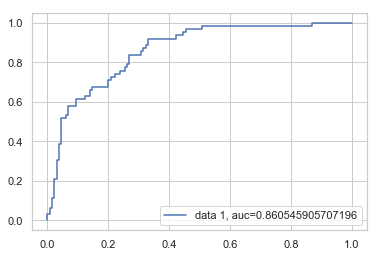

In [10]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()